### What is Customer Churn?

![Churn](https://media.licdn.com/dms/image/v2/D4D12AQEVyfblBXjyJQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1664222940349?e=2147483647&v=beta&t=3CyUZB2EBfKYgRLkoggeC3S3hjaHDOo9a54pZZHqLO0)

**Customer churn** refers to when a customer stops doing business with a company or service.  In subscription-based businesses, churn can severely impact revenue and growth. 
 
**Churn analysis** helps companies understand which customers are likely to leave and why — enabling proactive strategies to retain them.

---

### Dataset Used

We are using the **Telco Customer Churn dataset**, downloaded from [kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data) .

---

### Column Descriptions

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `customerID`        | Unique identifier for each customer (to be dropped)                         |
| `gender`            | Whether the customer is Male or Female                                      |
| `SeniorCitizen`     | Whether the customer is a senior citizen (1 = Yes, 0 = No)                  |
| `Partner`           | Whether the customer has a partner                                          |
| `Dependents`        | Whether the customer has dependents (e.g., children)                        |
| `tenure`            | Number of months the customer has stayed with the company                   |
| `PhoneService`      | Whether the customer has phone service                                      |
| `MultipleLines`     | Whether the customer has multiple lines                                     |
| `InternetService`   | Type of internet service (DSL, Fiber optic, or None)                        |
| `OnlineSecurity`    | Whether the customer has online security                                    |
| `OnlineBackup`      | Whether the customer has online backup                                      |
| `DeviceProtection`  | Whether the customer has device protection                                  |
| `TechSupport`       | Whether the customer has tech support                                       |
| `StreamingTV`       | Whether the customer has streaming TV                                       |
| `StreamingMovies`   | Whether the customer has streaming movies                                   |
| `Contract`          | Type of contract (Month-to-month, One year, Two year)                       |
| `PaperlessBilling`  | Whether the customer has paperless billing                                  |
| `PaymentMethod`     | Payment method used (e.g., Electronic check, Credit card)                   |
| `MonthlyCharges`    | The amount charged to the customer monthly                                  |
| `TotalCharges`      | Total amount charged to the customer                                        |
| `Churn`             | Whether the customer has churned (target variable: Yes or No)               |


### Import Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost # type: ignore

In [2]:
# Read CSV file
df = pd.read_csv('/Users/jaspreetkaur/Desktop/Projects/Customer_Churn_Analysis/Customer-Churn-Data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.describe(include=[object]) 

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


We will convert this column to a numeric (float) type using `pd.to_numeric()`, setting `errors='coerce'` to handle invalid entries as `NaN`.  

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
# Check for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting `TotalCharges` to numeric, we noticed 11 rows have missing values.  Since the number of missing rows is very small, we will drop them from the dataset.

In [8]:
# Drop rows
df.dropna(subset=['TotalCharges'], inplace=True)

The `customerID` column is just a unique identifier and doesn't contribute to predicting churn.  Hence, we will remove it from the dataset.

In [9]:
# Remove the customerID column
df_cleaned = df.drop('customerID', axis=1)

The target variable `Churn` contains two string values: `"Yes"` and `"No"`.  
We need to convert this into a binary format so that machine learning algorithms can process it.  
- `"Yes"` → 1  
- `"No"`  → 0  

In [10]:
# Convert the 'Churn' column to binary
df_cleaned['Churn'] = df_cleaned['Churn'].map({'Yes': 1, 'No': 0})

### EDA

We convert all categorical variables into dummy/indicator variables using one-hot encoding.


In [11]:
df_dummies = pd.get_dummies(df_cleaned)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


Check correlation of `Churn` with all other variables.

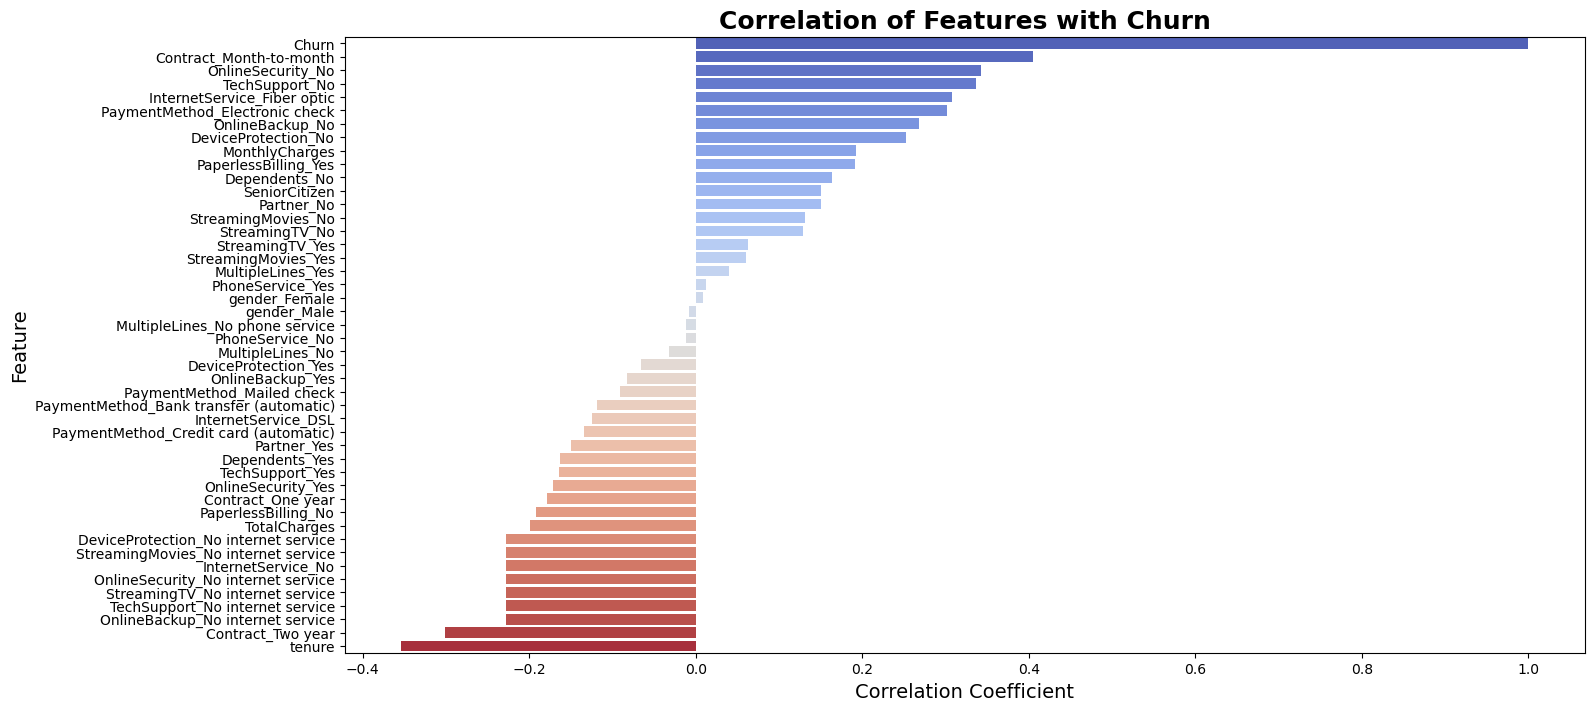

In [12]:
# Compute correlation
churn_corr = df_dummies.corr()['Churn'].sort_values(ascending=False)

# Plot with seaborn
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')

# Customise the plot
plt.title("Correlation of Features with Churn", fontsize=18, fontweight='bold')
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.show()



- Customers with a **month-to-month contract** are highly positively correlated with churn.
- Lack of **online security**, **tech support**, and **device protection** is also associated with higher churn.
- Features like **two-year contracts**, **senior citizens**, and **having dependents** are negatively correlated with churn.

These insights make intuitive sense that customers with longer commitments and more family responsibilities tend to stay longer, while those with short-term plans and fewer services are more likely to leave.




We will explore these patterns further through visualizations below, before moving into modeling and identifying the most important predictors of churn.


#### Categorical Features

To better understand the distribution of customer attributes, we will explore key categorical features.  

We'll begin by creating a reusable function to generate charts for any categorical column.


In [13]:
def make_piechart(df, target_feature, additional=''):
    """
    Plots a pie chart showing the distribution of values in a categorical column.

    Parameters:
    - df (DataFrame): The dataset
    - target_feature (str): Column name to visualize
    - additional (str): Optional note for printed description (e.g., label meanings)
    """
    counts = df[target_feature].value_counts()
    labels = counts.index.tolist()
    values = counts.values.tolist()

    # Plot pie chart
    palette_color = ["#4D95AF", "#B4DCEF", "#274E5D"]
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, colors=palette_color, autopct='%.1f%%', startangle=90)
    plt.title(f"Distribution of Customer's {target_feature.title()}", fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.show()

    # Print breakdown
    print_str = f"Distribution of customer's {target_feature.lower()}{additional}:"
    for label, value in zip(labels, values):
        print_str += f"\n{value} {label}"
    print(print_str)

##### 1. Gender Distribution

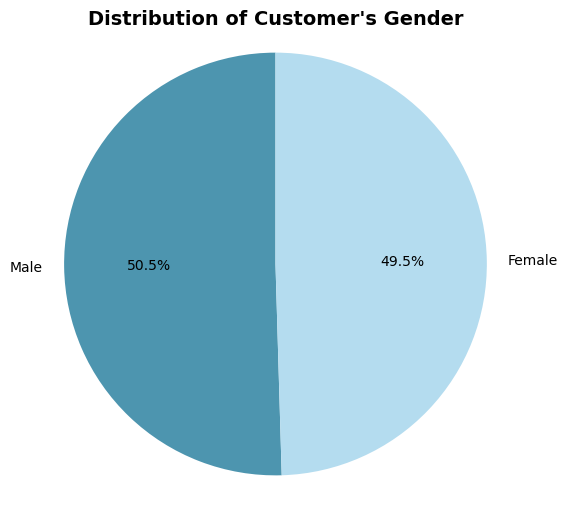

Distribution of customer's gender:
3549 Male
3483 Female


In [14]:
make_piechart(df_cleaned, 'gender')

The dataset has an almost even gender distribution which suggests that gender is unlikely to introduce bias in churn modeling and can be treated as a balanced demographic feature.


##### 2. Senior Citizen Status

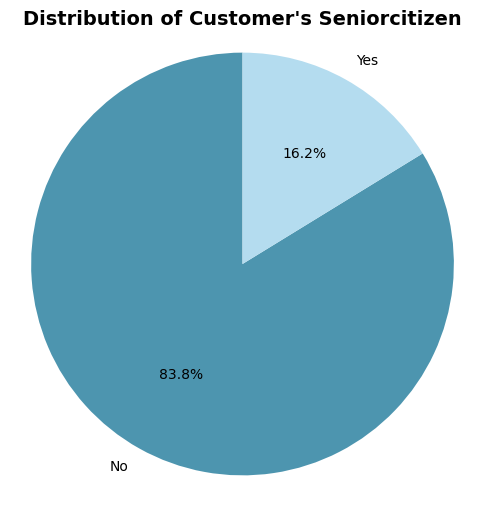

Distribution of customer's seniorcitizen:
5890 No
1142 Yes


In [15]:
# Note: `1 = Yes`, `0 = No`.
make_piechart(df_cleaned.replace({'SeniorCitizen': {1: 'Yes', 0: 'No'}}), 'SeniorCitizen')

Only **16.2%** of the customers are senior citizens, while **83.8%** are not.  
This highlights that the majority of the user base is younger. When modeling churn, it's important to analyze whether senior citizens have different churn behavior due to their smaller share in the dataset.


##### 3. Contract Types

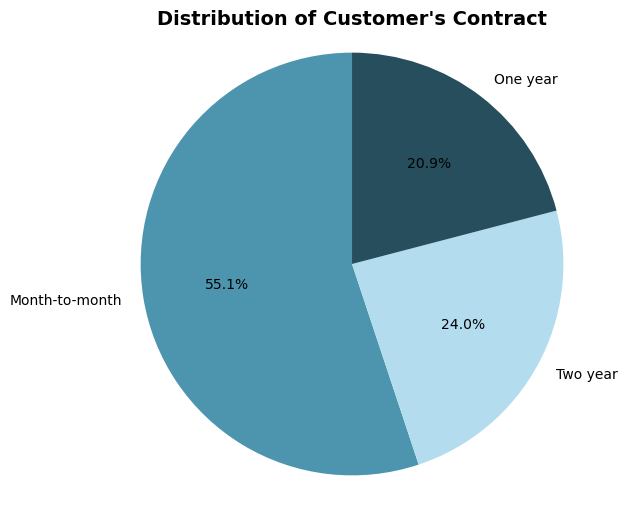

Distribution of customer's contract:
3875 Month-to-month
1685 Two year
1472 One year


In [16]:
make_piechart(df_cleaned, 'Contract')

The majority of customers (**55.1%**) are on a **month-to-month contract**, while only **20.9%** have a one-year contract and **24%** have a two-year contract.  

This suggests that many customers prefer flexibility, but it could also indicate a higher risk of churn as short-term plans are strongly correlated with higher churn rates.


##### 4. Relationship between Dependents and Partners

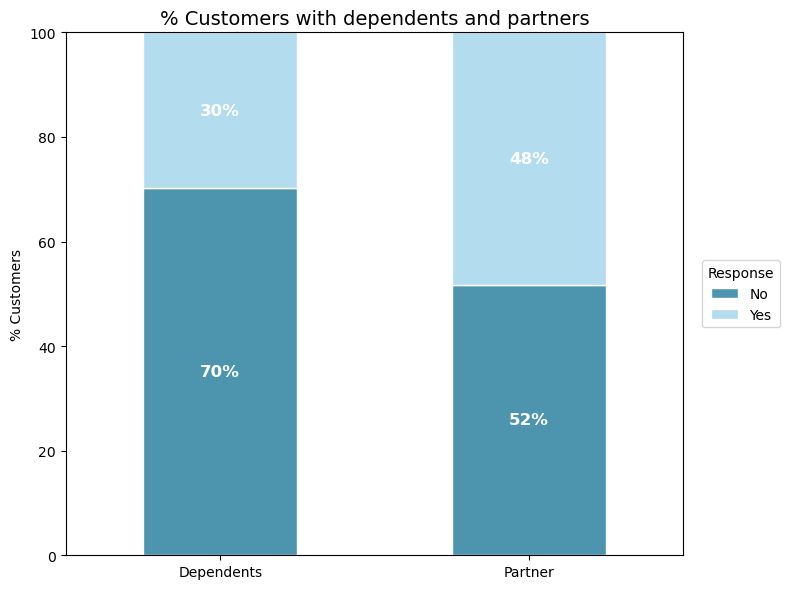

In [18]:
def plot_dependents_and_partners_percent_bar(df, title):
    """
    Plots two stacked percentage bars side-by-side:
    one for 'Dependents' and one for 'Partner'.

    Parameters:
    - df: pandas DataFrame with 'Dependents' and 'Partner' columns
    - title: Title of the plot
    """

    # Define colors
    colors = ["#4D95AF", "#B4DCEF"]

    # Calculate percentage distribution
    dependents_dist = df['Dependents'].value_counts(normalize=True).sort_index() * 100
    partner_dist = df['Partner'].value_counts(normalize=True).sort_index() * 100

    # Combine into a single DataFrame
    combined_df = pd.DataFrame({
        'Dependents': dependents_dist,
        'Partner': partner_dist
    }).T  # Transpose to get bars for each

    # Plot
    ax = combined_df.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6), width=0.5, edgecolor='white')

    # Add percentage labels inside bars
    for i, row in enumerate(combined_df.values):
        y_offset = 0
        for percent in row:
            ax.text(i, y_offset + percent / 2, f"{int(round(percent))}%",
                    ha='center', va='center', fontsize=12, fontweight='bold', color='white')
            y_offset += percent

    # Labels and styling
    plt.title(title, fontsize=14)
    plt.ylabel('% Customers')
    plt.xticks(rotation=0)
    plt.ylim(0, 100)

    # Legend
    plt.legend(['No', 'Yes'], title="Response", bbox_to_anchor=(1.02, 0.5), loc='center left')
    plt.tight_layout()
    plt.show()

plot_dependents_and_partners_percent_bar(df, 
    "% Customers with dependents and partners")

- **70%** of customers **do not have dependents**, while only **30%** do.
- **52%** of customers **do not have a partner**, and **48%** have one.
- Majority of customers are **independent individuals**, with fewer having family responsibilities.


##### 5. Dependents Distribution Among Partnered vs Non-Partnered Customers

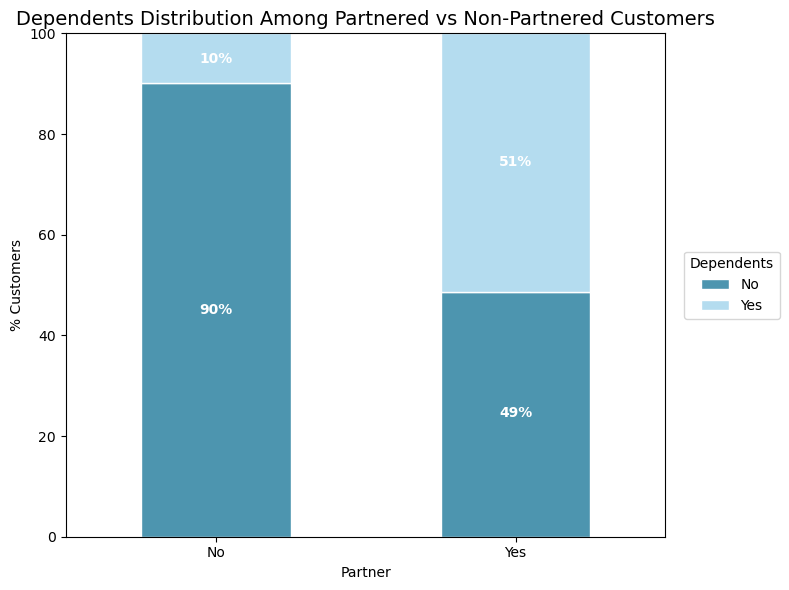

In [19]:
def plot_dependents_distribution_by_partner(df, group_col='Partner', stacked_col='Dependents', title='Dependents Distribution Among Partnered vs Non-Partnered Customers'):
    """
    Plots a stacked percentage bar chart showing the distribution of dependents among partnered vs non-partnered customers.
    
    Parameters:
    - df: DataFrame containing the data
    - group_col: Column to group by (default is 'Partner')
    - stacked_col: Column to show within each group (default is 'Dependents')
    - title: Title of the chart
    """

    # Calculate percentage distribution
    data = pd.crosstab(df[group_col], df[stacked_col], normalize='index') * 100
    data = data.round(1)

    # Define custom color palette
    colors = ["#4D95AF", "#B4DCEF"]

    # Plot
    ax = data.plot(kind='bar', stacked=True, figsize=(8, 6), 
                   color=colors, edgecolor='white', width=0.5)

    # Add labels that ensure total 100% visually
    for n, x in enumerate(data.index):
        y_offset = 0
        rounded_vals = []
        for c in data.columns[:-1]:
            val = round(data.loc[x, c])
            rounded_vals.append(val)
        # Force last value to 100 - sum(others)
        last_val = 100 - sum(rounded_vals)
        rounded_vals.append(last_val)

        # Plot the labels
        for i, c in enumerate(data.columns):
            val = rounded_vals[i]
            if val > 0:
                ax.text(n, y_offset + val / 2, f'{val}%', 
                        ha='center', va='center', color='white', fontweight='bold')
                y_offset += val

    # Labels & title
    plt.title(title, fontsize=14)
    plt.ylabel("% Customers")
    plt.xlabel(group_col)
    plt.xticks(rotation=0)
    plt.legend(title=stacked_col, bbox_to_anchor=(1.02, 0.5), loc='center left')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


plot_dependents_distribution_by_partner(df)


- Among non-partnered customers, only **10%** have dependents, while a dominant **90%** do not.
- In contrast, among partnered customers, **51%** have dependents and **49%** do not.
- This indicates that customers with partners are significantly more likely to have dependents than those without partners.


#### Multivariate Analysis

##### Customer Tenure Across Contract Types

To explore customer loyalty, we analyze how long customers stay (tenure) under different contract types: Month-to-month, One year, and Two year. This helps us identify patterns in customer retention based on contractual commitment.


**Tenure Distribution** 

/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


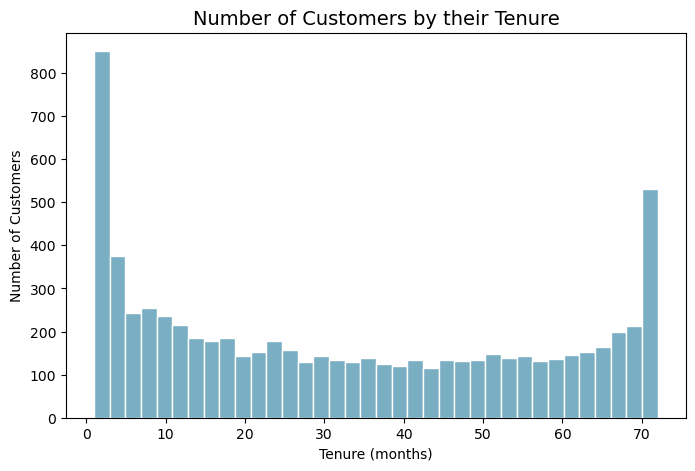

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['tenure'], bins=36, color="#4D95AF", edgecolor='white')
plt.title('Number of Customers by their Tenure', fontsize=14)
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

 A significant number of customers have very short tenures (around 1st month), while there is also a notable peak at the 72-month mark, indicating two distinct customer behaviors, early drop-offs and long-term loyalty.

 In the previous section, we explored the distribution of Contract Types using a pie chart ([see Distribution of Contract Type](#3-contract-types)). From this chart, we observed that a majority of customers (55%) are on Month-to-month contracts, followed by Two year and One year contracts.

Based on this insight, we now analyze the tenure distribution of customers across these contract types to better understand how contract length may influence customer loyalty and retention.

**Tenure by Contract Type**

/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaspreetkaur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


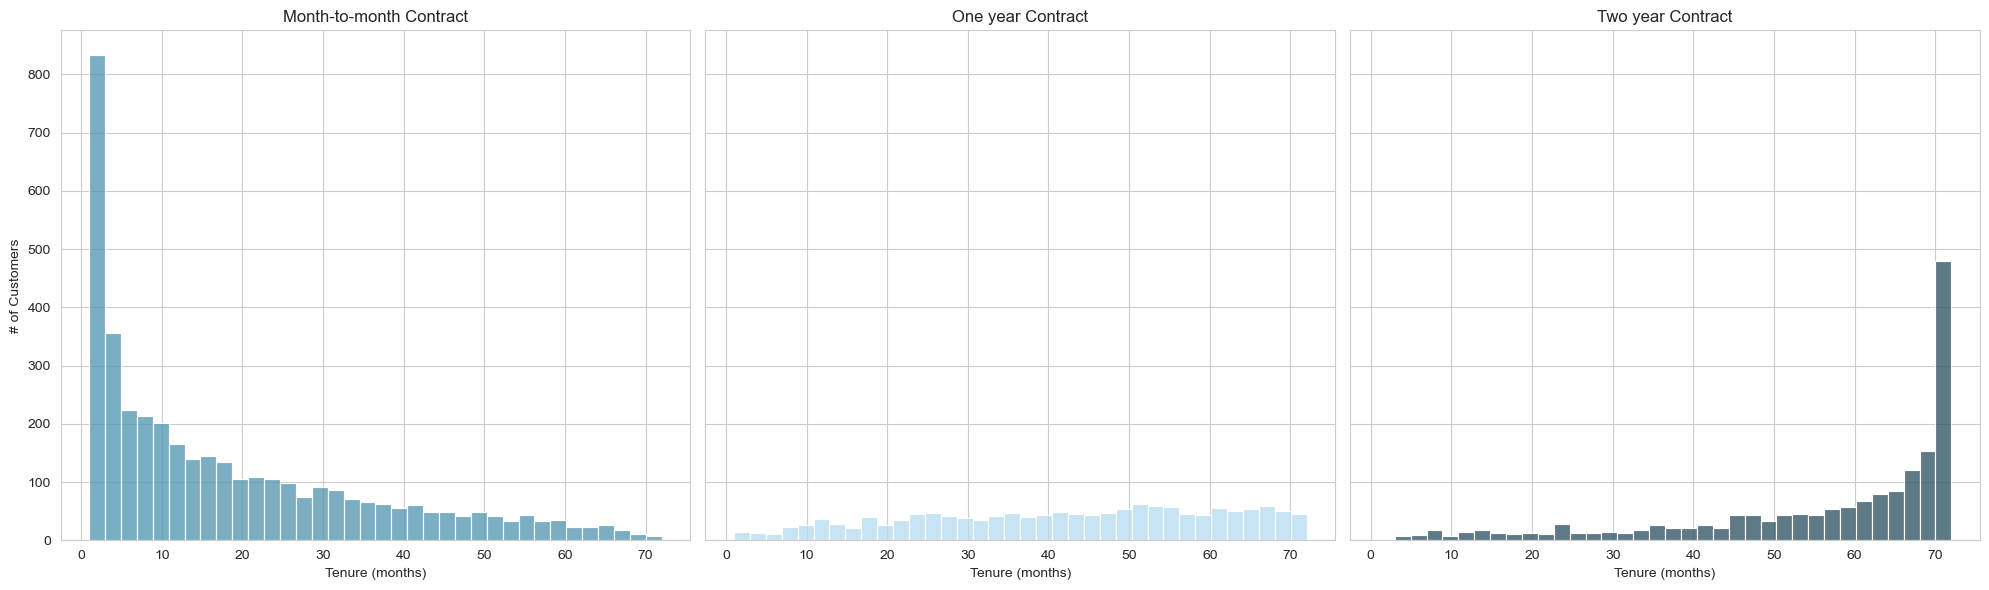

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

contracts = ['Month-to-month', 'One year', 'Two year']
colors = ["#4D95AF", "#B4DCEF", "#274E5D"]

for ax, contract, color in zip(axes, contracts, colors):
    sns.histplot(df_cleaned[df_cleaned['Contract'] == contract]['tenure'],
                 bins=36, color=color, edgecolor='white', ax=ax)
    ax.set_title(f'{contract} Contract')
    ax.set_xlabel('Tenure (months)')
    ax.set_ylabel('# of Customers')

plt.tight_layout()
plt.show()

The tenure distribution across different contract types reveals clear patterns in customer retention behavior:

- Month-to-month customers show a sharp drop-off after the first few months, indicating a higher likelihood of early churn. This aligns with the flexibility offered by such contracts, allowing customers to leave easily.

- One-year contracts exhibit more stability, with customers gradually increasing in tenure, suggesting moderate retention.

- Two-year contracts show the highest customer loyalty, with a noticeable peak near the 72-month mark. These customers are likely more committed due to long-term engagement and possibly bundled discounts or incentives.

**Conclusion:**

Longer contract durations are positively associated with customer retention. This insight can help the business tailor retention strategies such as offering longer-term discounts or loyalty programs to encourage month-to-month users to shift toward longer contracts and reduce churn.

##### Distribution of Various Services Subscribed by Customers

 Now, we analyse how customers are distributed across different service features such as phone service, internet service, and value-added services like streaming, backup, and tech support. Understanding the usage of these services can help identify which offerings are popular and which ones may need improvement or promotion.

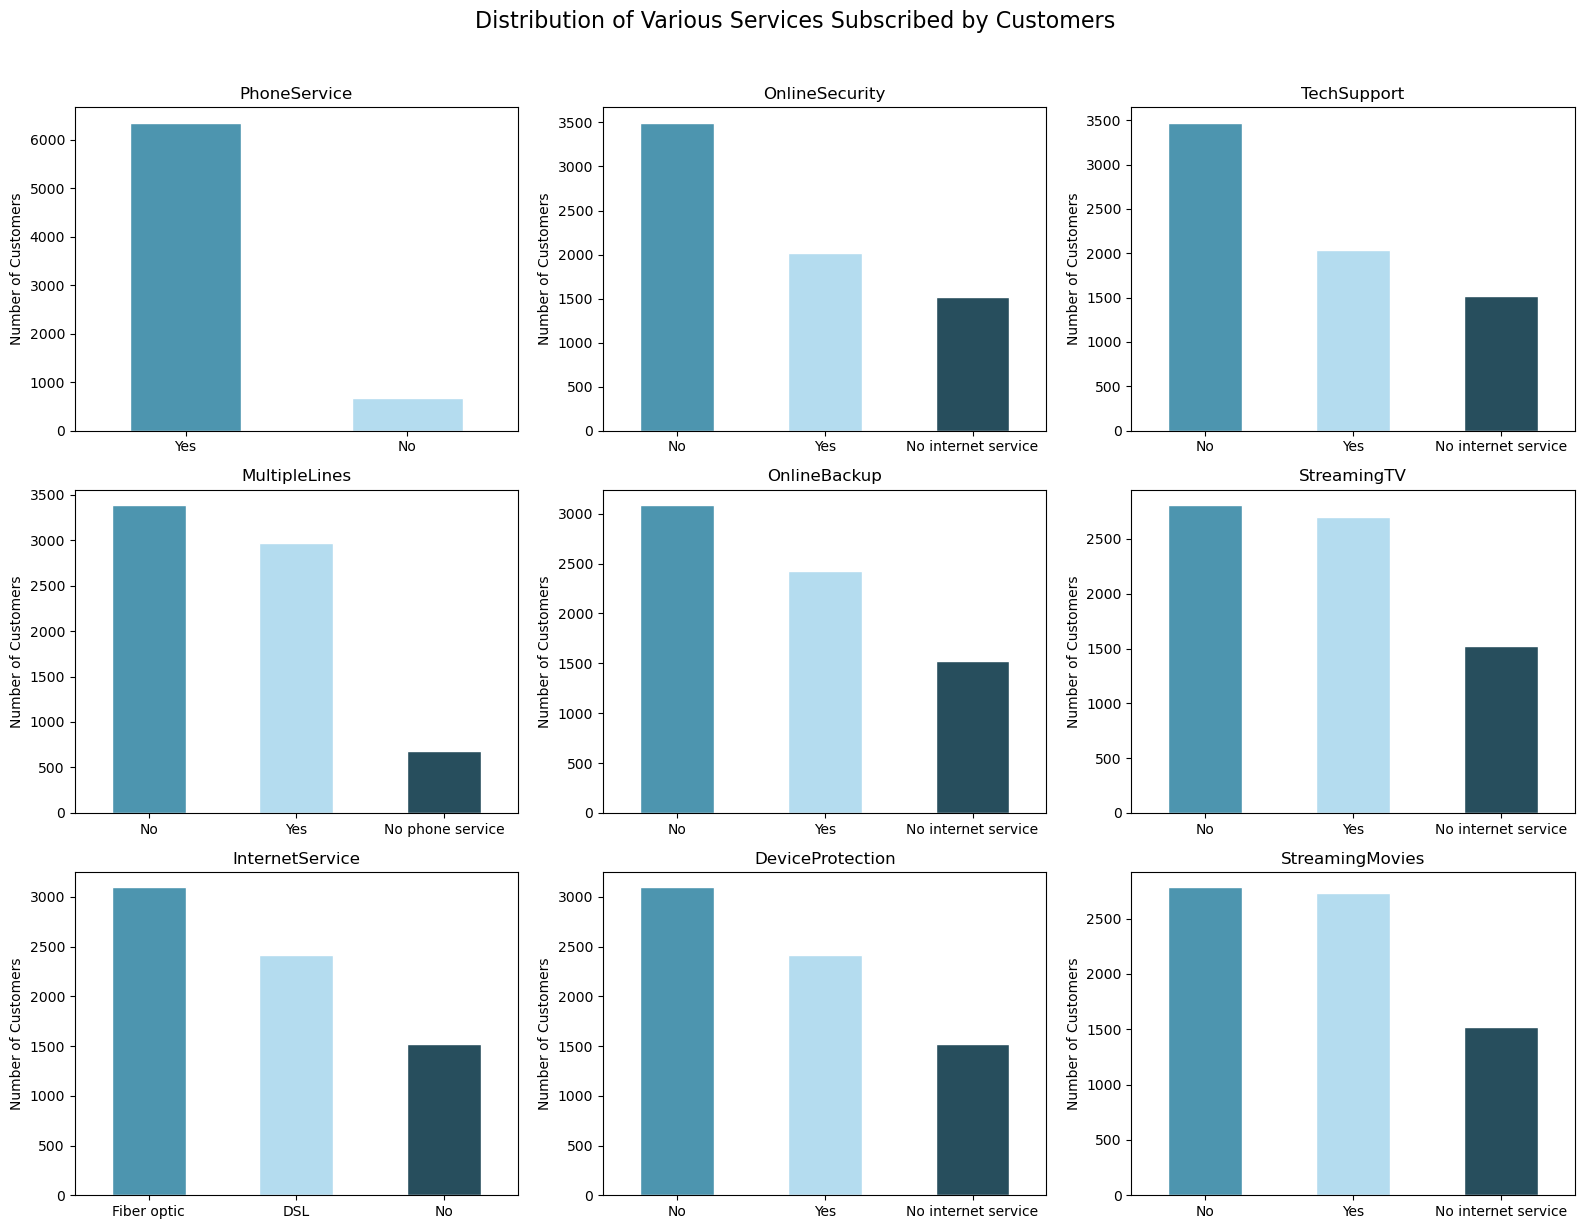

In [25]:
# Define the list of service-related columns to analyze
services = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplot grid (3 rows x 3 columns) to plot all 9 services
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.suptitle('Distribution of Various Services Subscribed by Customers', fontsize=16, y=1.02)

# Loop through each service and plot its distribution
for i, service in enumerate(services):
    # Determine subplot position
    row = i % 3
    col = i // 3
    
    # Plot bar chart for the current service
    palette_color = ["#4D95AF", "#B4DCEF", "#274E5D"]
    ax = axes[row][col]
    df_cleaned[service].value_counts().plot(kind='bar', ax=ax, rot=0, color=palette_color, edgecolor='white')
    ax.set_title(service)
    ax.set_ylabel('Number of Customers')
    ax.set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

- **PhoneService**: The vast majority of customers (~90%) have opted for phone service, showing it as a commonly used feature.
- **MultipleLines**: Among those with phone service, a balanced distribution exists between single-line and multi-line users, though more customers have only a single line.
- **InternetService**: Fiber optic is the most popular, followed by DSL. A significant portion (~20%) does not use internet services at all.
- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**: For all these value-added services, most customers have **not** subscribed, even if they have internet—indicating possible low perceived value or lack of awareness.
- **StreamingTV and StreamingMovies**: Usage is relatively balanced between users and non-users, with a moderate portion of customers not having access due to no internet service.

While core services like phone and internet are widely adopted, **add-on services are underutilized**. This presents an opportunity for targeted promotions or bundling strategies to improve adoption and customer stickiness.


##### Relationship Between Monthly and Total Charges

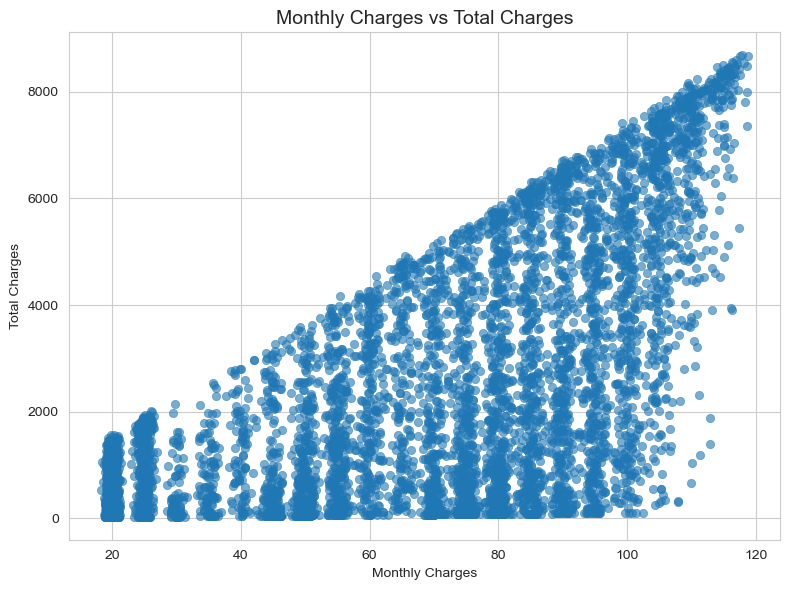

In [26]:
# Set figure size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create scatter plot
sns.scatterplot(data=df_cleaned, x='MonthlyCharges', y='TotalCharges', alpha=0.6, edgecolor=None)

# Add labels and title
plt.title('Monthly Charges vs Total Charges', fontsize=14)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')

# Show plot
plt.tight_layout()
plt.show()

There is a clear positive linear relationship between Monthly Charges and Total Charges. As expected, customers who have been with the company longer (higher tenure) accumulate higher total charges. The linear spread indicates that most customers are billed consistently over time. However, a dense cluster near the bottom left suggests a significant number of newer customers with lower total charges.


#### Churn-Based Analysis


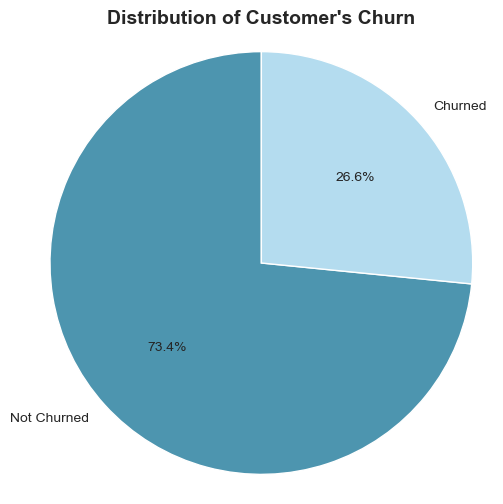

Distribution of customer's churn:
5163 Not Churned
1869 Churned


In [29]:
make_piechart(df_cleaned.replace({'Churn': {1: 'Churned', 0: 'Not Churned'}}), 'Churn')